In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los archivos CSV exportados
df_sedes = pd.read_csv('exports/sedes.csv')
df_migraciones = pd.read_csv('exports/emigracion.csv')
df_paises = pd.read_csv('exports/paises.csv')
df_redes_sociales = pd.read_csv('exports/redes_sociales.csv')

In [ ]:
"""mi intención es graficar la correlación entre el flujo migratorio de esos paises con argentina, 
y la cantidad de 1. sedes y 2. secciones por país."""



In [18]:
#cantidad de sedes por pais
df_sedes_pais = df_sedes.groupby('ISO3').size().reset_index(name='cantidad')
df_sedes_pais = df_sedes_pais.sort_values(by='cantidad', ascending=False)
df_sedes_pais.head(10)

,ISO3,cantidad
8,BRA,10
77,USA,8
13,CHN,7
24,ESP,6
3,AUS,4
6,BEL,4
7,BOL,4
10,CAN,4
22,ECU,4
38,ISR,4


In [3]:
# Filtrar migraciones para los años 1960, 1970, 1980, 1990, y 2000
df_migraciones_filtrado = df_migraciones[df_migraciones['anio'].isin([1960, 1970, 1980, 1990, 2000])]

# Unir las sedes con las migraciones (tanto como origen y destino)
df_sedes_origen = pd.merge(df_sedes, df_migraciones_filtrado, left_on='ISO3', right_on='ISO3_origen')
df_sedes_destino = pd.merge(df_sedes, df_migraciones_filtrado, left_on='ISO3', right_on='ISO3_destino')

# Agrupar por ISO3 para obtener la suma del flujo migratorio
flujo_origen = df_sedes_origen.groupby('ISO3')['cantidad'].sum().reset_index().rename(columns={'cantidad': 'emigracion'})
flujo_destino = df_sedes_destino.groupby('ISO3')['cantidad'].sum().reset_index().rename(columns={'cantidad': 'inmigracion'})

# Unir las emigraciones e inmigraciones
flujo_total = pd.merge(flujo_origen, flujo_destino, on='ISO3', how='outer').fillna(0)

# Calcular el flujo migratorio promedio (la diferencia entre inmigración y emigración, dividido entre 5 años)
flujo_total['flujo_migratorio'] = (flujo_total['inmigracion'] - flujo_total['emigracion']) / 5

# Unir con la tabla de países para obtener la región geográfica
flujo_paises_region = pd.merge(flujo_total, df_paises[['ISO3', 'region_geografica']], on='ISO3')

flujo_total.head()

,ISO3,emigracion,inmigracion,flujo_migratorio
0,AGO,2173210,489718,-336698.4
1,ARE,400022,8801284,1680252.4
2,ARM,5144608,3104420,-408037.6
3,AUS,5483164,58639452,10631257.6
4,AUT,2940817,3993032,210443.0


In [ ]:
"""mi intención es graficar la correlación entre el flujo migratorio de esos paises con argentina, 
y la cantidad de 1. sedes y 2. secciones por país."""



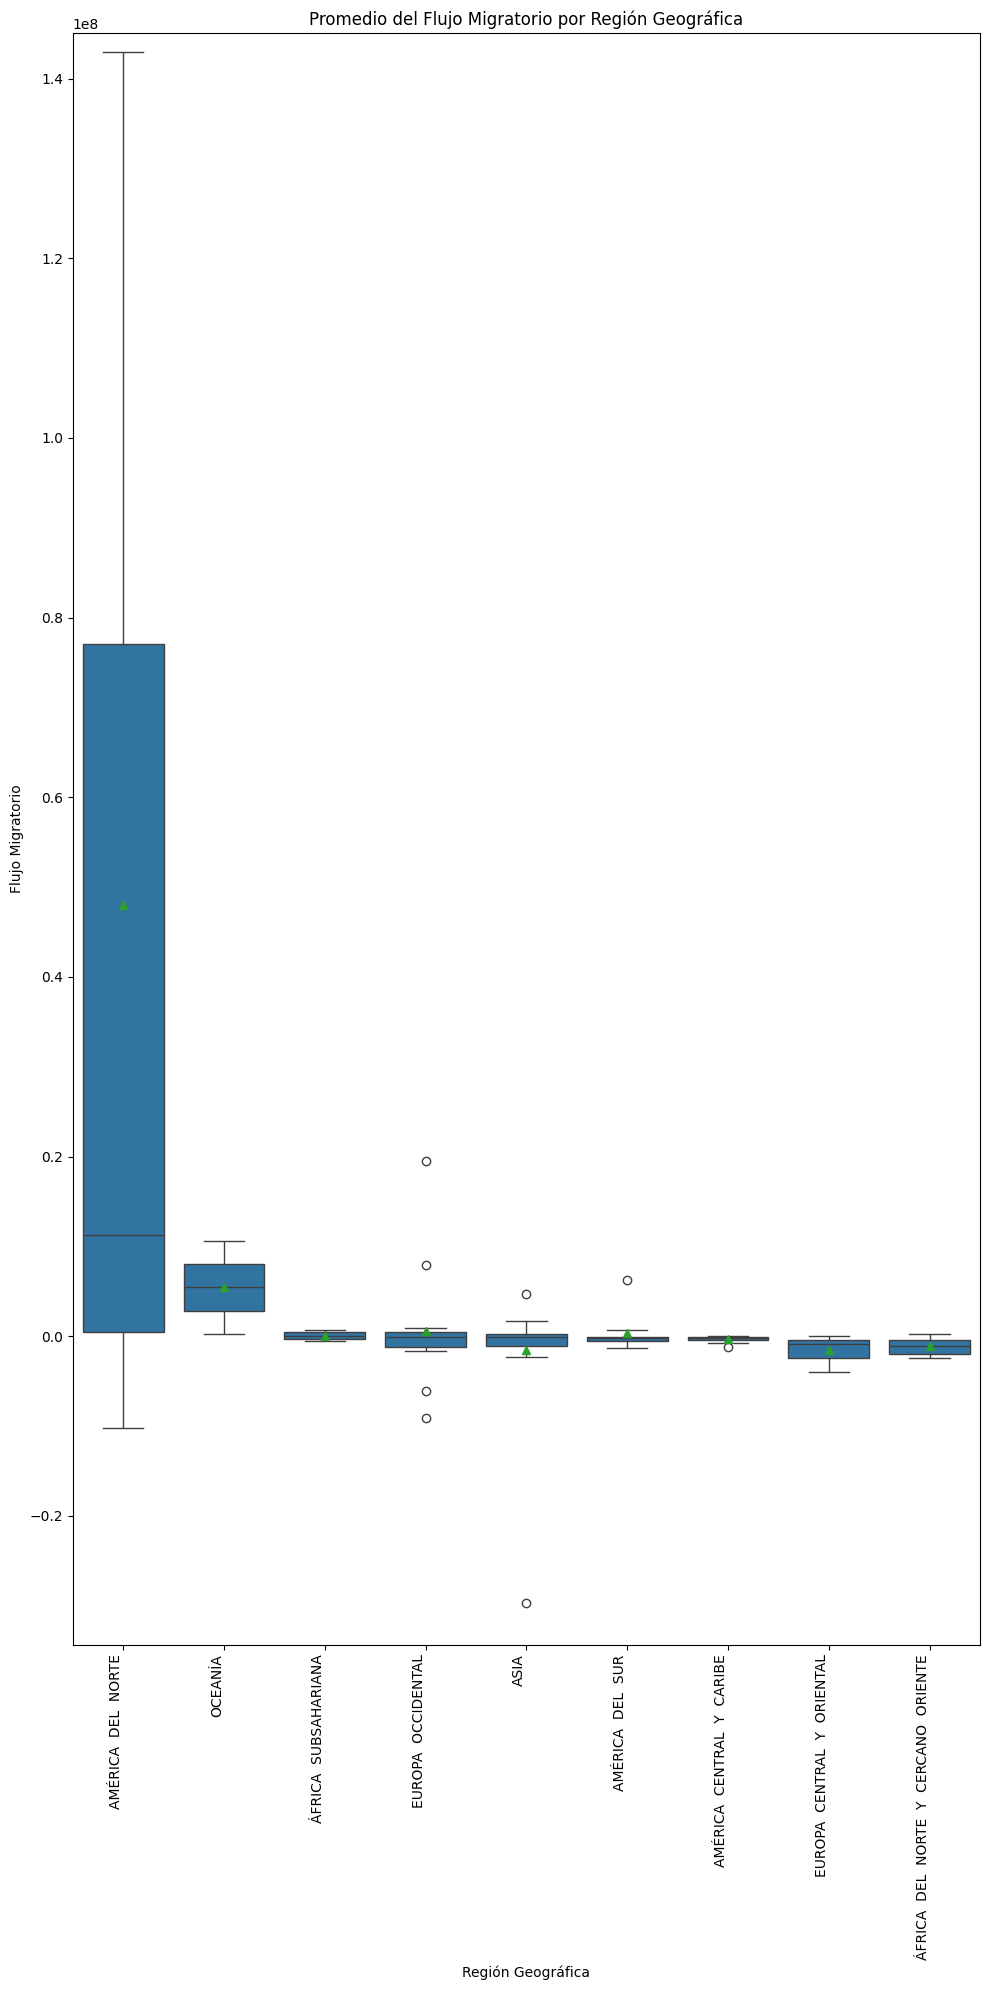

In [4]:
# Calcular la mediana del flujo migratorio por región geográfica
medianas = flujo_paises_region.groupby('region_geografica')['flujo_migratorio'].median().sort_values(ascending=False)

# Crear la figura
plt.figure(figsize=(10, 20))

# Graficar el boxplot, ordenado por la mediana de cada región
sns.boxplot(x='region_geografica', y='flujo_migratorio', data=flujo_paises_region, 
            showmeans=True, order=medianas.index)

# Agregar título y etiquetas a los ejes
plt.title('Promedio del Flujo Migratorio por Región Geográfica')
plt.xlabel('Región Geográfica')
plt.ylabel('Flujo Migratorio')

# Rotar etiquetas en el eje x
plt.xticks(rotation=90, ha="right")

# Limitar el rango de valores de los ejes automáticamente
q1 = flujo_paises_region['flujo_migratorio'].quantile(0.25)
q3 = flujo_paises_region['flujo_migratorio'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 30 * iqr
upper_bound = q3 + 130 * iqr
plt.ylim(lower_bound, upper_bound)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


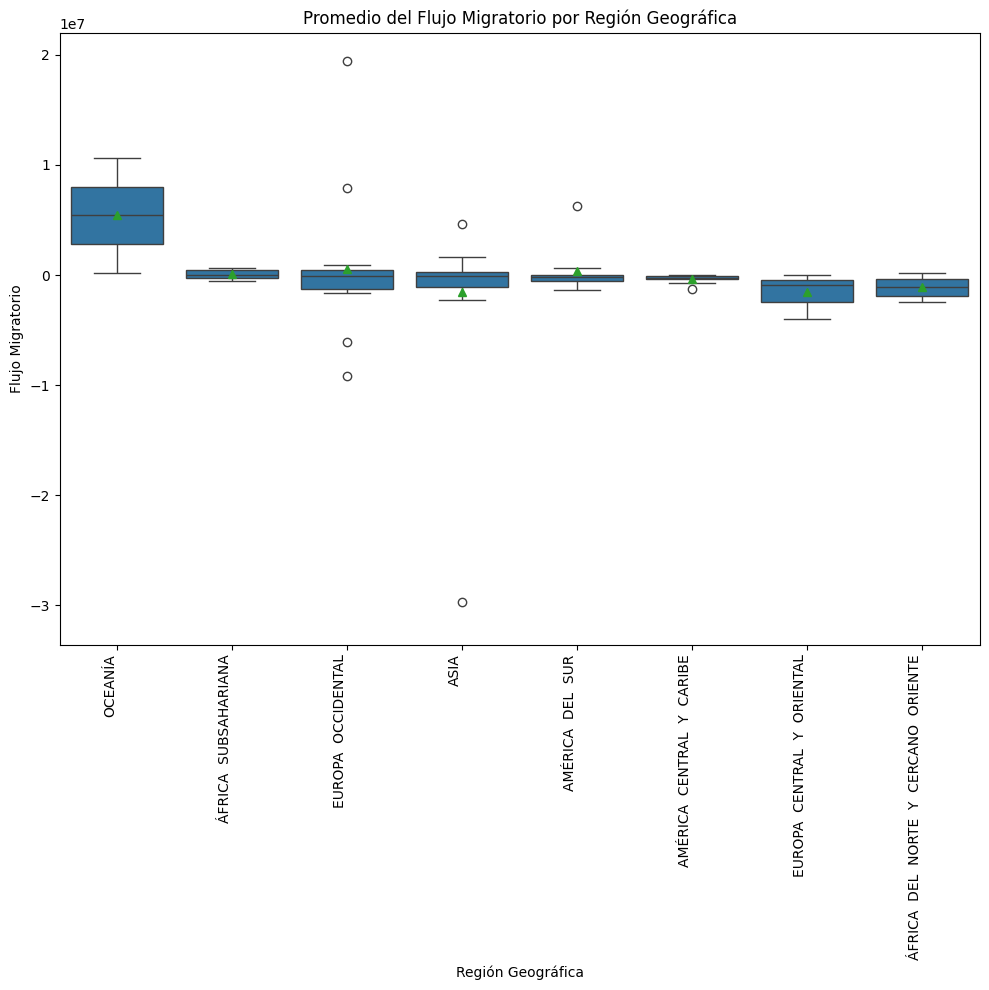

In [12]:

# quitar AMERICA DEL NORTE
flujo_paises_region = flujo_paises_region[flujo_paises_region['region_geografica'] != 'AMÉRICA  DEL  NORTE']

# Calcular la mediana del flujo migratorio por región geográfica
medianas = flujo_paises_region.groupby('region_geografica')['flujo_migratorio'].median().sort_values(ascending=False)

# Crear la figura
plt.figure(figsize=(10, 10))

# Graficar el boxplot, ordenado por la mediana de cada región
sns.boxplot(x='region_geografica', y='flujo_migratorio', data=flujo_paises_region, 
            showmeans=True, order=medianas.index)

# Agregar título y etiquetas a los ejes
plt.title('Promedio del Flujo Migratorio por Región Geográfica')
plt.xlabel('Región Geográfica')
plt.ylabel('Flujo Migratorio')

# Rotar etiquetas en el eje x
plt.xticks(rotation=90, ha="right")

# Limitar el rango de valores de los ejes automáticamente
q1 = flujo_paises_region['flujo_migratorio'].quantile(0.25)
q3 = flujo_paises_region['flujo_migratorio'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 30 * iqr
upper_bound = q3 + 20 * iqr
plt.ylim(lower_bound, upper_bound)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# Ejercicio III (prototipo)

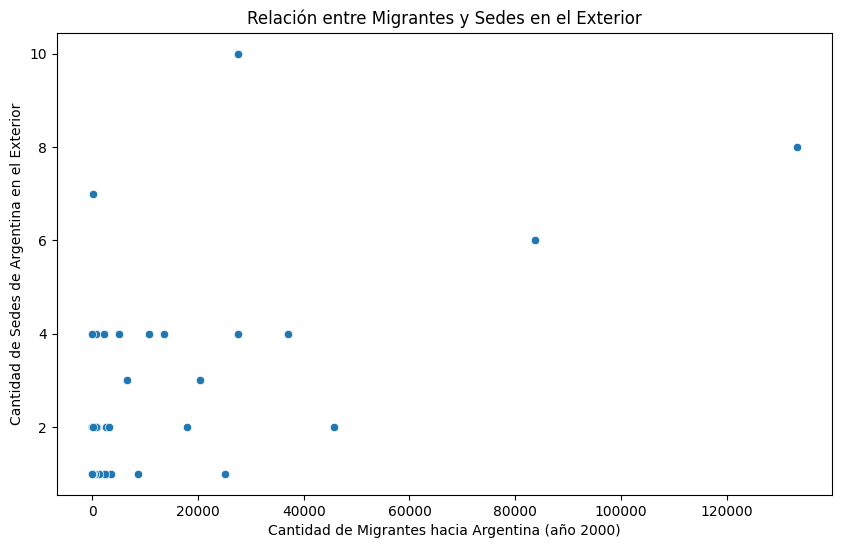

In [6]:
# Filtramos las migraciones del año 2000
df_migraciones_2000 = df_migraciones[df_migraciones['anio'] == 2000]

# Unimos las migraciones con los datos de los países para obtener los nombres y la región
df_migraciones_paises = df_migraciones_2000.merge(df_paises, left_on='ISO3_destino', right_on='ISO3', how='inner')

# Filtramos solo los flujos migratorios hacia Argentina
df_migraciones_argentina = df_migraciones_paises[df_migraciones_paises['ISO3_origen'] == 'ARG']

# Agrupamos los datos de sedes por país y contamos cuántas sedes hay en cada uno
df_sedes_cantidad = df_sedes.groupby('ISO3').size().reset_index(name='cantidad_sedes')

# Unimos la tabla de migraciones hacia Argentina con la cantidad de sedes
df_final = df_migraciones_argentina.merge(df_sedes_cantidad, left_on='ISO3_destino', right_on='ISO3', how='left')

# Convertimos la columna de cantidad de migrantes a numérica
df_final['cantidad'] = pd.to_numeric(df_final['cantidad'], errors='coerce')

# Graficamos la relación con un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cantidad', y='cantidad_sedes', data=df_final)

# Etiquetas y título
plt.xlabel('Cantidad de Migrantes hacia Argentina (año 2000)')
plt.ylabel('Cantidad de Sedes de Argentina en el Exterior')
plt.title('Relación entre Migrantes y Sedes en el Exterior')

# Mostramos el gráfico
plt.show()

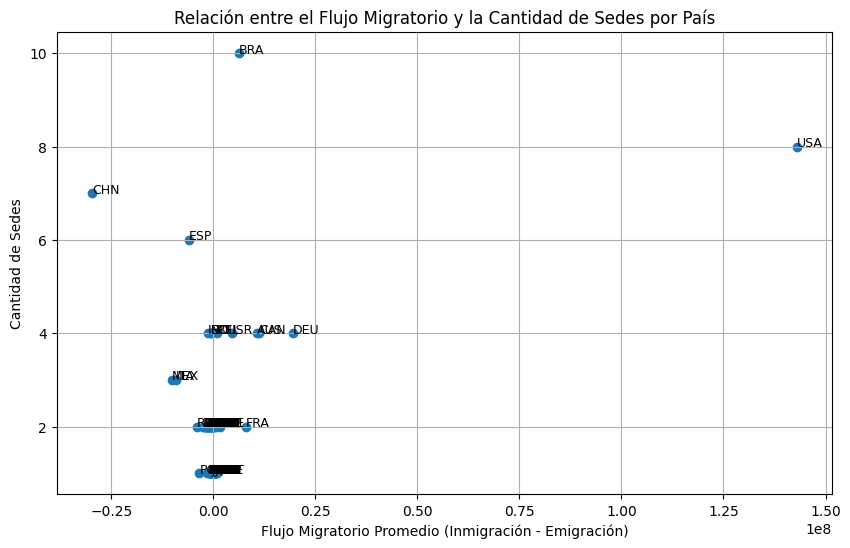

In [19]:
# Ordenar por flujo migratorio (menor a mayor)
flujo_total = flujo_total.sort_values(by='flujo_migratorio', ascending=True)

# Cantidad de sedes por país
df_sedes_pais = df_sedes.groupby('ISO3').size().reset_index(name='cantidad')

# Combinar los datos de sedes con el flujo migratorio
df_plot = pd.merge(flujo_total, df_sedes_pais, on='ISO3', how='inner')

# Crear scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_plot['flujo_migratorio'], df_plot['cantidad'])

# Agregar etiquetas a los puntos (ISO3 de cada país)
for i, txt in enumerate(df_plot['ISO3']):
    plt.annotate(txt, (df_plot['flujo_migratorio'].iloc[i], df_plot['cantidad'].iloc[i]), fontsize=9)

# Añadir títulos y etiquetas
plt.title('Relación entre el Flujo Migratorio y la Cantidad de Sedes por País')
plt.xlabel('Flujo Migratorio Promedio (Inmigración - Emigración)')
plt.ylabel('Cantidad de Sedes')

# Mostrar gráfico
plt.grid(True)
plt.show()

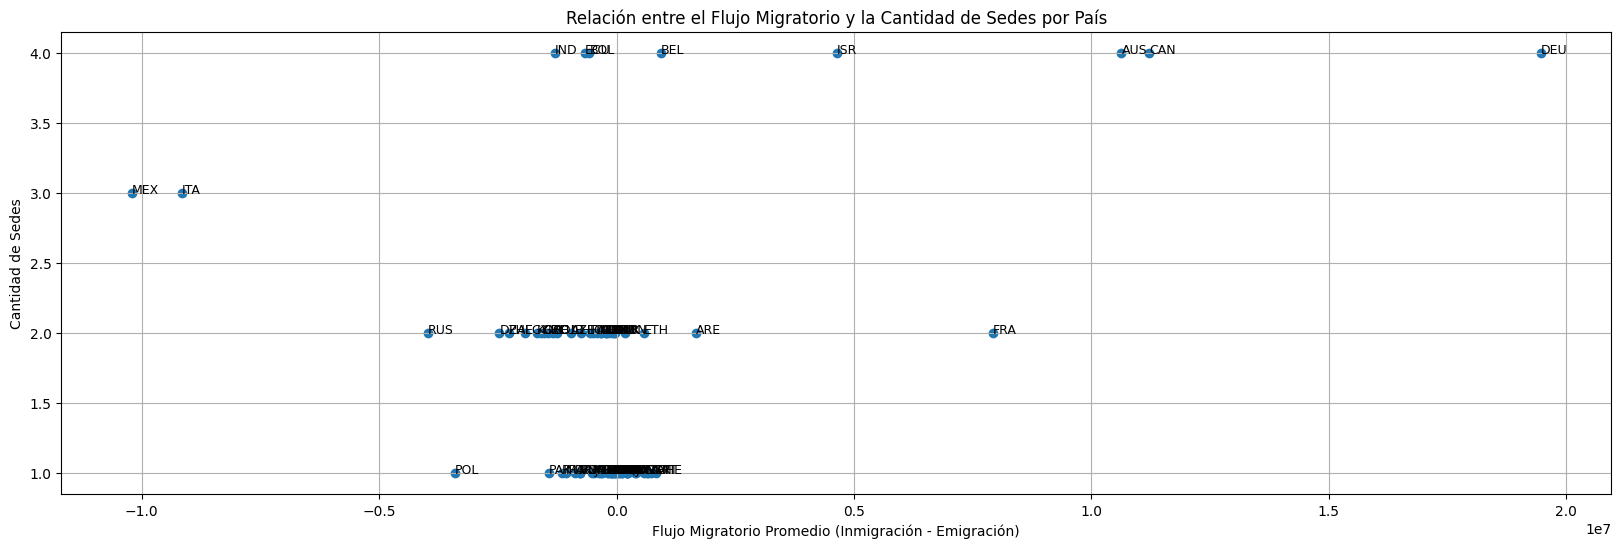

In [21]:
# sacamos de la lista a CHN BRA USA y ESP y repetimos
df_plot2 = df_plot[~df_plot['ISO3'].isin(['CHN', 'BRA', 'USA', 'ESP'])]

# Crear scatter plot
plt.figure(figsize=(20, 6))
plt.scatter(df_plot2['flujo_migratorio'], df_plot2['cantidad'])

# Agregar etiquetas a los puntos (ISO3 de cada país)
for i, txt in enumerate(df_plot2['ISO3']):
    plt.annotate(txt, (df_plot2['flujo_migratorio'].iloc[i], df_plot2['cantidad'].iloc[i]), fontsize=9)

# Añadir títulos y etiquetas
plt.title('Relación entre el Flujo Migratorio y la Cantidad de Sedes por País')
plt.xlabel('Flujo Migratorio Promedio (Inmigración - Emigración)')
plt.ylabel('Cantidad de Sedes')

# Mostrar gráfico
plt.grid(True)
plt.show()


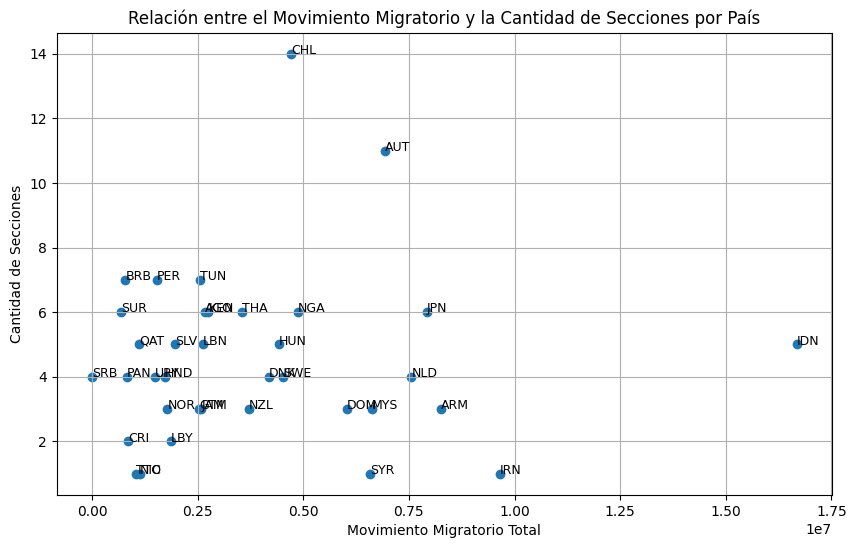

In [28]:
# filtrar los países donde el modulo del flujo migratorio es menor 500000
df_plot = df_plot[abs(df_plot['flujo_migratorio']) < 500000]

# crear columna movimiento total, sumando emigracion e inmigracion
df_plot['movimiento_total'] = df_plot['emigracion'] + df_plot['inmigracion']

# traer cantidad de secciones por pais
df_secciones_pais = df_sedes.groupby('ISO3')['cantidad_secciones'].sum().reset_index(name='cantidad_secciones')

# unir con el dataframe anterior
df_plot = pd.merge(df_plot, df_secciones_pais, on='ISO3', how='inner')

# graficar
plt.figure(figsize=(10, 6))
plt.scatter(df_plot['movimiento_total'], df_plot['cantidad_secciones'])

# agregar etiquetas
for i, txt in enumerate(df_plot['ISO3']):
    plt.annotate(txt, (df_plot['movimiento_total'].iloc[i], df_plot['cantidad_secciones'].iloc[i]), fontsize=9)

# agregar títulos y etiquetas
plt.title('Relación entre el Movimiento Migratorio y la Cantidad de Secciones por País')
plt.xlabel('Movimiento Migratorio Total')
plt.ylabel('Cantidad de Secciones')

# mostrar gráfico
plt.grid(True)
plt.show()
